In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [5]:
df = pd.read_csv('data v_1.csv') 
df = df.drop(columns = 'Unnamed: 0')
df.head(1)

,Load: Load Number,Load: Created Date,Actual Pickup Date,Origin Zip Code,Destination Zip Code,Origin State,Destination State,Mode,Linear Feet,Total Weight,Distance (Miles),Total HU,Revenue (Mixed) Currency,Revenue (Mixed),Carrier Cost (Mixed) Currency,Carrier Cost (Mixed),Target buy rate,GS Network buy rate
0,SHP5161932,8/5/2024,8/6/2024,45786,33316,Ohio,Florida,Partial F/SD (LTL Spot Market),20.5,1675.0,1081.85,2.0,USD,1600.0,USD,1450.0,2761.0,2732.0


### Limpieza adicional

Hacemos la limpieza de datos adicional que concluimos en la familiarización

In [6]:
print('Tamaño muestra original:', len(df))
df = df[df['Linear Feet'] >= 1]
df = df[df['Carrier Cost (Mixed)'] >= 100]
print('Tamaño muestra:', len(df))

Tamaño muestra original: 1722
Tamaño muestra: 1582


Agregamos información de regiones

|Northeast|Southeast|Southwest|Midwest|West|
|---------|---------|---------|-------|----|
|Connecticut|	Alabama|	Arizona|Illinois|California|
|Delaware|	Arkansas|	Colorado|Indiana|Idaho|
|Maine|	Florida|	Kansas|	Iowa	|Montana||
|Massachusetts|	Georgia|	New Mexico|	Michigan|Nevada|
|Maryland|	Kentucky|	Oklahoma|	Minnesota|Oregon|
|New Hampshire|	Louisiana|	Texas|	Missouri|Utah|
|New Jersey|	Mississippi||Nebraska|Washington|
|New York|	North Carolina||North Dakota|	Wyoming|
|Pennsylvania|	South Carolina||Ohio||
|Rhode Island|	Tennessee||South Dakota||	 
|Vermont|	Virginia||Wisconsin||
|District of Columbia|West Virginia|||	 

In [7]:
#Asignar región según el estado
mapeo = {'Connecticut': 'Northeast', 'Delaware': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'Maryland': 'Northeast', 
         'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 
         'Vermont': 'Northeast', 'District of Columbia': 'Northeast', 
         'Alabama': 'Southeast', 'Arkansas': 'Southeast', 'Florida': 'Southeast', 'Georgia': 'Southeast', 
         'Kentucky': 'Southeast', 'Louisiana': 'Southeast', 'Mississippi': 'Southeast', 'North Carolina': 'Southeast', 
         'South Carolina': 'Southeast', 'Tennessee': 'Southeast', 'Virginia': 'Southeast', 'West Virginia': 'Southeast', 
         'Arizona': 'Southwest', 'Colorado': 'Southwest', 'Kansas': 'Southwest', 'New Mexico': 'Southwest', 
         'Oklahoma': 'Southwest', 'Texas': 'Southwest', 
         'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Michigan': 'Midwest', 
         'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 
         'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest', 
         'California': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West',
         'Oregon': 'West', 'Utah': 'West', 'Washington': 'West', 'Wyoming': 'West',
         'Ontario': 'Canada', 'British Columbia': 'Canada', 'Alberta': 'Canada', 'Quebec': 'Canada', 
         'Manitoba': 'Canada', 'Saskatchewan': 'Canada', 'Nova Scotia': 'Canada', 'New Brunswick': 'Canada', 
         'Newfoundland and Labrador': 'Canada', 'Yukon': 'Canada', 'Prince Edward Island': 'Canada', 'Northwest Territories': 'Canada', 
         'Alaska': 'Offshore'}
df['Region Origen'] = df['Origin State'].map(mapeo)
df['Region Destino'] = df['Destination State'].map(mapeo)
df.head(1)

,Load: Load Number,Load: Created Date,Actual Pickup Date,Origin Zip Code,Destination Zip Code,Origin State,Destination State,Mode,Linear Feet,Total Weight,Distance (Miles),Total HU,Revenue (Mixed) Currency,Revenue (Mixed),Carrier Cost (Mixed) Currency,Carrier Cost (Mixed),Target buy rate,GS Network buy rate,Region Origen,Region Destino
0,SHP5161932,8/5/2024,8/6/2024,45786,33316,Ohio,Florida,Partial F/SD (LTL Spot Market),20.5,1675.0,1081.85,2.0,USD,1600.0,USD,1450.0,2761.0,2732.0,Midwest,Southeast


### Correlación

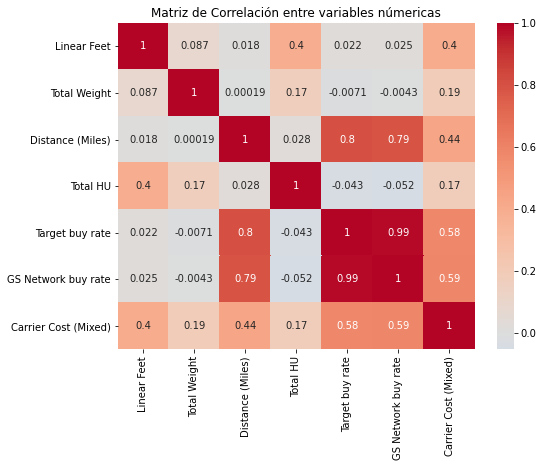

In [10]:
selected_columns = ['Linear Feet','Total Weight', 'Distance (Miles)', 'Total HU', 'Target buy rate', 'GS Network buy rate', 'Carrier Cost (Mixed)']
df_selected = df[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Crear un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre variables númericas')
plt.show()

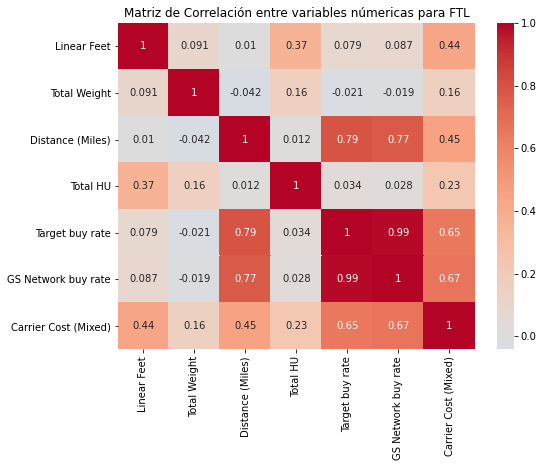

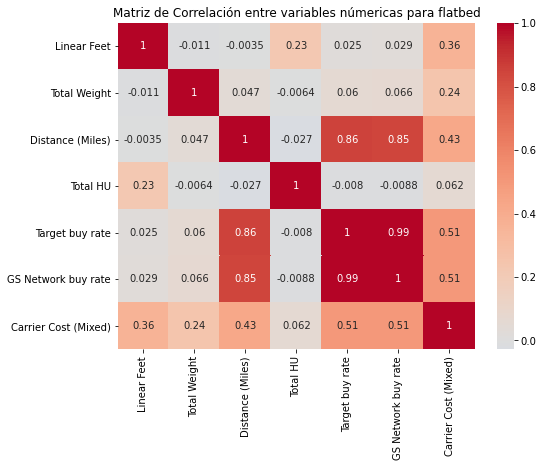

In [11]:
ftl = df[df['Mode']== "Partial Van (LTL Spot Market)"]
ftl= ftl.reset_index()
ftl = ftl.drop(columns='index')
df_selected = ftl[selected_columns]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre variables númericas para FTL')
plt.show()

#FLat
flat = df[df['Mode']!= "Partial Van (LTL Spot Market)"]
flat= flat.reset_index()
flat = flat.drop(columns='index')
df_selected = flat[selected_columns]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre variables númericas para flatbed')
plt.show()

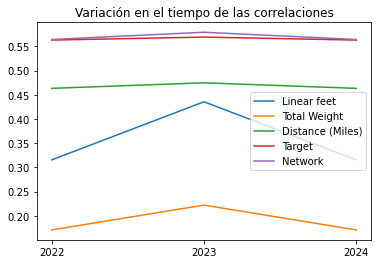

In [31]:
df['Load: Created Date'] = pd.to_datetime(df['Load: Created Date'])  # Asegúrate de que la columna de fecha esté en formato datetime

# Filtrar solo las filas del año 2022
df_2022 = df[df['Load: Created Date'].dt.year == 2022]
df_2023 = df[df['Load: Created Date'].dt.year == 2023]
df_2024 = df[df['Load: Created Date'].dt.year == 2024]
df_2022 = df_2022.reset_index()
df_2022 = df_2022.drop(columns='index')
df_2023 = df_2023.reset_index()
df_2023 = df_2023.drop(columns='index')
df_2024 = df_2024.reset_index()
df_2024 = df_2024.drop(columns='index')

lft = []
Weight = []
Miles = []
Target = []
Network = []
for i in range(0,3):
    if i == 0:
        corr = df_2022
    if i == 1:
        corr = df_2023
    else:
        corr = df_2024
    df_selected = corr[['Linear Feet', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    lft.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Total Weight', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Weight.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Distance (Miles)', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Miles.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Target buy rate', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Target.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['GS Network buy rate', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Network.append(correlation_matrix['Carrier Cost (Mixed)'][0])

year = ['2022', '2023', '2024']
plt.figure()
plt.plot(year, lft, label = 'Linear feet')
plt.plot(year, Weight, label = 'Total Weight')
plt.plot(year, Miles, label = 'Distance (Miles)')
plt.plot(year, Target, label = 'Target')
plt.plot(year, Network, label = 'Network')
plt.legend()
plt.title('Variación en el tiempo de las correlaciones')
plt.show()

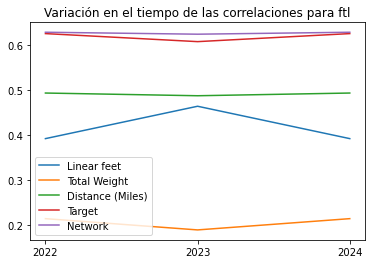

In [32]:
ftl['Load: Created Date'] = pd.to_datetime(ftl['Load: Created Date'])  # Asegúrate de que la columna de fecha esté en formato datetime

# Filtrar solo las filas del año 2022
df_2022 = ftl[ftl['Load: Created Date'].dt.year == 2022]
df_2023 = ftl[ftl['Load: Created Date'].dt.year == 2023]
df_2024 = ftl[ftl['Load: Created Date'].dt.year == 2024]
df_2022 = df_2022.reset_index()
df_2022 = df_2022.drop(columns='index')
df_2023 = df_2023.reset_index()
df_2023 = df_2023.drop(columns='index')
df_2024 = df_2024.reset_index()
df_2024 = df_2024.drop(columns='index')

lft = []
Weight = []
Miles = []
Target = []
Network = []
for i in range(0,3):
    if i == 0:
        corr = df_2022
    if i == 1:
        corr = df_2023
    else:
        corr = df_2024
    df_selected = corr[['Linear Feet', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    lft.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Total Weight', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Weight.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Distance (Miles)', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Miles.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Target buy rate', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Target.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['GS Network buy rate', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Network.append(correlation_matrix['Carrier Cost (Mixed)'][0])

year = ['2022', '2023', '2024']
plt.figure()
plt.plot(year, lft, label = 'Linear feet')
plt.plot(year, Weight, label = 'Total Weight')
plt.plot(year, Miles, label = 'Distance (Miles)')
plt.plot(year, Target, label = 'Target')
plt.plot(year, Network, label = 'Network')
plt.legend()
plt.title('Variación en el tiempo de las correlaciones para ftl')
plt.show()

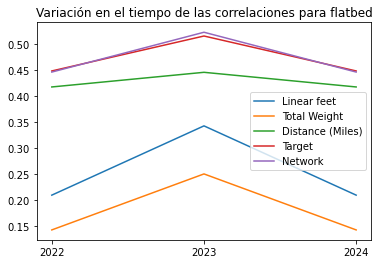

In [34]:
flat['Load: Created Date'] = pd.to_datetime(flat['Load: Created Date'])  # Asegúrate de que la columna de fecha esté en formato datetime

# Filtrar solo las filas del año 2022
df_2022 = flat[flat['Load: Created Date'].dt.year == 2022]
df_2023 = flat[flat['Load: Created Date'].dt.year == 2023]
df_2024 = flat[flat['Load: Created Date'].dt.year == 2024]
df_2022 = df_2022.reset_index()
df_2022 = df_2022.drop(columns='index')
df_2023 = df_2023.reset_index()
df_2023 = df_2023.drop(columns='index')
df_2024 = df_2024.reset_index()
df_2024 = df_2024.drop(columns='index')

lft = []
Weight = []
Miles = []
Target = []
Network = []
for i in range(0,3):
    if i == 0:
        corr = df_2022
    if i == 1:
        corr = df_2023
    else:
        corr = df_2024
    df_selected = corr[['Linear Feet', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    lft.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Total Weight', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Weight.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Distance (Miles)', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Miles.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['Target buy rate', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Target.append(correlation_matrix['Carrier Cost (Mixed)'][0])
    df_selected = corr[['GS Network buy rate', 'Carrier Cost (Mixed)']]
    correlation_matrix = df_selected.corr()
    Network.append(correlation_matrix['Carrier Cost (Mixed)'][0])

year = ['2022', '2023', '2024']
plt.figure()
plt.plot(year, lft, label = 'Linear feet')
plt.plot(year, Weight, label = 'Total Weight')
plt.plot(year, Miles, label = 'Distance (Miles)')
plt.plot(year, Target, label = 'Target')
plt.plot(year, Network, label = 'Network')
plt.legend()
plt.title('Variación en el tiempo de las correlaciones para flatbed')
plt.show()